In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',100)
pd.set_option('display.max_colwidth',160)
sns.set(rc={'figure.figsize': (20,3)})
%matplotlib inline
reviews=pd.read_csv('reviews.csv.gz', usecols=['date', 'comments'])
reviews['date']=pd.to_datetime(reviews.date)
reviews['year']=reviews.date.dt.year
reviews.head(3)

,date,comments,year
0,2009-12-05,"Colleen was friendly and very helpful regarding directions, maps and suggestions for places to go.\r\nHer flat is centrally located and it's easy to walk ab...",2009
1,2010-03-31,"Great place, centrally located, easy walk to train station, bus station across the street. Walking distance to great bars, clubs, and restaurants. Very go...",2010
2,2010-05-14,Colleen is very friendly and helpful. The apartment is nice and located conveniently.,2010


In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548607 entries, 0 to 548606
Data columns (total 3 columns):
date        548607 non-null datetime64[ns]
comments    548322 non-null object
year        548607 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 12.6+ MB


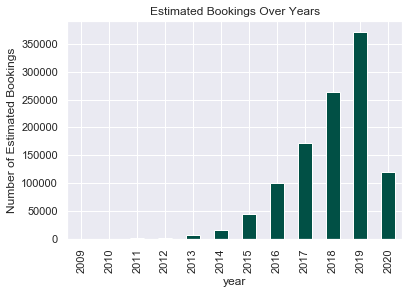

In [16]:
reviews_count=reviews.groupby('year')['date'].count()
bookings=reviews_count * 2
# reviews_year = pd.DataFrame(reviews_data.groupby(['year']).review_date.count().reset_index())
# bookings.plot(kind='bar', color='#B0BF1A')
plt.title('Estimated Bookings Over Years')
plt.ylabel('Number of Estimated Bookings')
bookings.plot(kind='bar', color='#015045')


In [5]:
reviews.columns

Index(['date', 'comments', 'year'], dtype='object')

In [58]:
reviews['comments']=reviews.comments.str.replace('!','')
reviews['comments']=reviews.comments.str.replace(',','')
reviews['comments']=reviews.comments.str.replace('.','')
reviews['comments']=reviews.comments.str.replace('+','')
reviews['comments']=reviews.comments.str.replace('%','')
reviews['comments']=reviews.comments.str.replace('!','')
reviews['comments']=reviews.comments.str.replace(':','')
reviews['comments']=reviews.comments.str.replace('\'','')
reviews['comments']=reviews.comments.str.replace('\\','')
reviews['comments']=reviews.comments.str.replace('/','')
reviews['comments']=reviews.comments.str.replace('-','')
reviews['comments']=reviews.comments.str.replace('(','')
reviews['comments']=reviews.comments.str.replace(')','')

In [73]:
reviews.columns
reviews.comments.head(1000)
pd.to_excel('revised_comments.xlsx')

AttributeError: module 'pandas' has no attribute 'to_excel'